### 2. Feature Selection- With Correlation
In this step we will be removing the features which are highly correlated 

In [2]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Loading the dataset
data = load_boston()


C:\Users\thewa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [4]:
data


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
data.data #IV

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
data.target #DV

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
columns_name = data.feature_names

In [9]:
columns_name

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
#data === data.data (independent columns) , column_name == data.feature_names

In [10]:
df = pd.DataFrame(data.data, columns = columns_name)#IV CONTENT ASWELL AS IV COLUMN NAMES


In [11]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [14]:
data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [12]:
df["MEDV"] = data.target #dependent colummn CONTENT

In [13]:
df #IV AS WELL AS DV

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [18]:
df.head()  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
X = df.drop("MEDV",axis=1)   #independent variable : all column except Target Dv colun
y = df["MEDV"] #dependent variables only target column will be in Y

In [15]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
X.head()#independent variable

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [16]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=40)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [25]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
410,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
481,5.70818,0.0,18.10,0.0,0.532,6.750,74.9,3.3317,24.0,666.0,20.2,393.07,7.74
69,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79
41,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,22.05110,0.0,18.10,0.0,0.740,5.818,92.4,1.8662,24.0,666.0,20.2,391.45,22.11
165,2.92400,0.0,19.58,0.0,0.605,6.101,93.0,2.2834,5.0,403.0,14.7,240.16,9.81
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50


In [17]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.232639,0.474881,-0.056108,0.497717,-0.280983,0.395303,-0.433603,0.723127,0.666014,0.322503,-0.502606,0.490661
ZN,-0.232639,1.000000,-0.527979,-0.027068,-0.509242,0.308809,-0.587891,0.663063,-0.301899,-0.303292,-0.373757,0.185029,-0.436682
INDUS,0.474881,-0.527979,1.000000,0.059056,0.766134,-0.421389,0.625803,-0.699613,0.596193,0.726095,0.378369,-0.386446,0.628917
CHAS,-0.056108,-0.027068,0.059056,1.000000,0.076969,0.132907,0.068698,-0.092745,-0.008484,-0.042510,-0.156399,0.032184,-0.094589
NOX,0.497717,-0.509242,0.766134,0.076969,1.000000,-0.293611,0.721665,-0.760506,0.644953,0.689760,0.231631,-0.420358,0.602036
RM,-0.280983,0.308809,-0.421389,0.132907,-0.293611,1.000000,-0.235002,0.176214,-0.205993,-0.298689,-0.333190,0.171030,-0.605902
AGE,0.395303,-0.587891,0.625803,0.068698,0.721665,-0.235002,1.000000,-0.736685,0.448591,0.489497,0.290315,-0.283164,0.613827
DIS,-0.433603,0.663063,-0.699613,-0.092745,-0.760506,0.176214,-0.736685,1.000000,-0.491883,-0.523685,-0.252374,0.308520,-0.486608
RAD,0.723127,-0.301899,0.596193,-0.008484,0.644953,-0.205993,0.448591,-0.491883,1.000000,0.899081,0.442695,-0.483922,0.498509
TAX,0.666014,-0.303292,0.726095,-0.042510,0.689760,-0.298689,0.489497,-0.523685,0.899081,1.000000,0.445025,-0.472961,0.554494


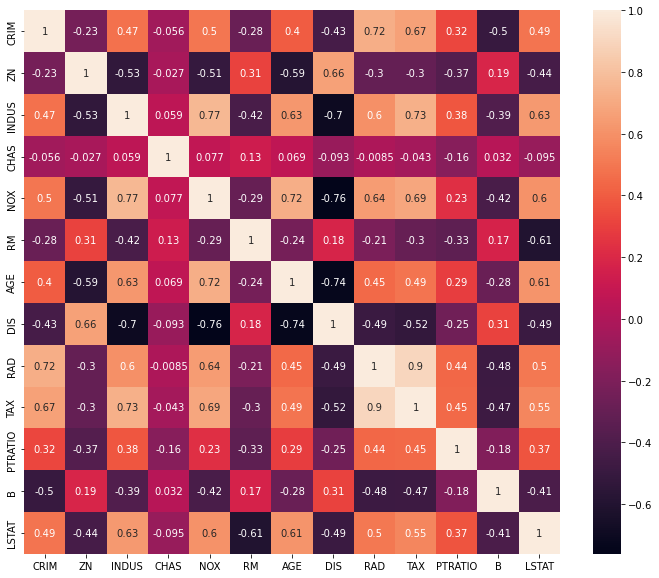

In [18]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [19]:
import numpy as np
arr =  np.array([[11,22,33],
                [44,55,66],
                [77,88,99]])

In [21]:
arr[1][0]

44

In [22]:

arr

array([[11, 22, 33],
       [44, 55, 66],
       [77, 88, 99]])

In [33]:
for row in range(len(arr)):
    for col in range(len(arr)):
        print(f"{arr[row][col]}")

11
22
33
44
55
66
77
88
99


In [30]:
arr

array([[11, 22, 33],
       [44, 55, 66],
       [77, 88, 99]])

In [48]:
for row in range(len(arr)-1,1,-1):
    for col in range(len(arr)-1,row,-1):
        print(f"{arr[row][col]}")

In [37]:
for row in range(len(arr)):
    for col in range(row):
        print(f"{arr[row][col]}")

44
77
88


In [49]:
arr

array([[11, 22, 33],
       [44, 55, 66],
       [77, 88, 99]])

In [36]:
for i in range(len(arr)):
    for j in range(i):
        if arr[i,j] % 2 == 0:
            print(f"even element is {arr[i][j]}")

even element is 44
even element is 88


In [51]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):#X_train,0.5
    col_corr = set()  # Set of all the names of correlated columns
    col_corr_lst = []
    print(f"set initial {col_corr}")
    print(f"list initial {col_corr_lst}")
    corr_arr = dataset.corr() #corr_arr is my correlaion matrix which is 2d
    for row in range(len(corr_arr)):
        for col in range(row): 
            if abs(corr_arr.iloc[row, col]) > threshold: # we are interested in absolute coeff value
                colname = corr_arr.columns[row]  # getting the name of column
                col_corr_lst.append(colname)
                col_corr.add(colname)
                print(f"colname name which is correlated is {colname}")
                print(f"set {col_corr}")
                print(f"lst {col_corr_lst}")


    print(f"list is {col_corr_lst}")
    return col_corr

In [52]:
corr_features = correlation(X_train, 0.5)#data,threshold
len(set(corr_features))

set initial set()
list initial []
colname name which is correlated is INDUS
set {'INDUS'}
lst ['INDUS']
colname name which is correlated is NOX
set {'NOX', 'INDUS'}
lst ['INDUS', 'NOX']
colname name which is correlated is NOX
set {'NOX', 'INDUS'}
lst ['INDUS', 'NOX', 'NOX']
colname name which is correlated is AGE
set {'NOX', 'INDUS', 'AGE'}
lst ['INDUS', 'NOX', 'NOX', 'AGE']
colname name which is correlated is AGE
set {'NOX', 'INDUS', 'AGE'}
lst ['INDUS', 'NOX', 'NOX', 'AGE', 'AGE']
colname name which is correlated is AGE
set {'NOX', 'INDUS', 'AGE'}
lst ['INDUS', 'NOX', 'NOX', 'AGE', 'AGE', 'AGE']
colname name which is correlated is DIS
set {'NOX', 'DIS', 'INDUS', 'AGE'}
lst ['INDUS', 'NOX', 'NOX', 'AGE', 'AGE', 'AGE', 'DIS']
colname name which is correlated is DIS
set {'NOX', 'DIS', 'INDUS', 'AGE'}
lst ['INDUS', 'NOX', 'NOX', 'AGE', 'AGE', 'AGE', 'DIS', 'DIS']
colname name which is correlated is DIS
set {'NOX', 'DIS', 'INDUS', 'AGE'}
lst ['INDUS', 'NOX', 'NOX', 'AGE', 'AGE', 'AGE', 'D

8

In [43]:
corr_features

{'AGE', 'B', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'RAD', 'TAX'}

In [53]:
X_train.drop(corr_features,axis=1,inplace = True)
X_test.drop(corr_features,axis=1,inplace = True)

In [ ]:
X_train

In [30]:
X_test

,CRIM,ZN,CHAS,RM,PTRATIO
358,5.20177,0.0,1.0,6.127,20.2
197,0.04666,80.0,0.0,7.107,12.6
48,0.25387,0.0,0.0,5.399,17.9
450,6.71772,0.0,0.0,6.749,20.2
469,13.07510,0.0,0.0,5.713,20.2
...,...,...,...,...,...
212,0.21719,0.0,1.0,5.807,18.6
133,0.32982,0.0,0.0,5.822,21.2
279,0.21038,20.0,0.0,6.812,14.9
274,0.05644,40.0,1.0,6.758,17.6


In [31]:
X_train

,CRIM,ZN,CHAS,RM,PTRATIO
58,0.15445,25.0,0.0,6.145,19.7
410,51.13580,0.0,0.0,5.757,20.2
481,5.70818,0.0,0.0,6.750,20.2
69,0.12816,12.5,0.0,5.885,18.9
41,0.12744,0.0,0.0,6.770,17.9
...,...,...,...,...,...
440,22.05110,0.0,0.0,5.818,20.2
165,2.92400,0.0,0.0,6.101,14.7
7,0.14455,12.5,0.0,6.172,15.2
219,0.11425,0.0,1.0,6.373,16.4


#### Let try with Big Dataset
https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv

In [54]:
import pandas as pd
df=pd.read_csv("E:/My Documents/Machine Learning/DataSets/santander-customer-satisfaction/train.csv.zip",nrows=10000)


In [34]:
df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.00,195.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20069,2,52,150.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27745.740000,1
9996,20070,2,23,90.0,51.06,51.06,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120468.090000,0
9997,20071,2,37,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98462.880000,0
9998,20072,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102070.770000,0


In [73]:
from sklearn.model_selection import train_test_split

X=df.drop(labels=['TARGET'], axis=1) #indep. variable
y=df['TARGET'] #dependeent var
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3, #30% 
    random_state=20)

In [74]:
X_train.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,1.000000,-0.003403,-0.009835,0.026627,0.014428,0.008956,0.001320,-0.009126,0.016327,0.016000,...,-0.002339,-0.006178,-0.006675,-0.003495,-0.003012,-0.012279,-0.009498,-0.007818,-0.007087,-0.006665
var3,-0.003403,1.000000,-0.008829,0.001251,0.006914,0.006773,0.001606,0.001465,0.000732,0.000771,...,0.000534,0.000496,0.000545,0.000533,0.000563,0.000825,0.000542,0.001034,0.001028,0.000257
var15,-0.009835,-0.008829,1.000000,0.031756,0.107624,0.110794,0.061487,0.065895,0.018595,0.015806,...,0.025054,0.020484,0.021381,0.020905,0.021434,0.025150,0.021360,0.030117,0.028635,-0.005203
imp_ent_var16_ult1,0.026627,0.001251,0.031756,1.000000,0.013480,0.012709,0.001935,0.001465,0.003865,0.008586,...,0.026239,-0.000599,-0.000649,-0.000648,-0.000681,-0.000981,-0.000621,-0.001252,-0.001243,-0.001053
imp_op_var39_comer_ult1,0.014428,0.006914,0.107624,0.013480,1.000000,0.885663,0.381342,0.320188,0.090046,0.123015,...,0.010972,0.030849,0.051275,0.039457,0.048878,-0.002781,-0.003418,-0.002130,-0.002293,0.001373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,-0.012279,0.000825,0.025150,-0.000981,-0.002781,-0.001180,-0.001246,-0.001116,-0.000575,-0.000606,...,0.071572,-0.000377,-0.000408,-0.000408,-0.000429,1.000000,0.901908,0.888196,0.916327,0.015528
saldo_medio_var44_hace3,-0.009498,0.000542,0.021360,-0.000621,-0.003418,-0.002251,-0.000788,-0.000706,-0.000364,-0.000383,...,-0.000266,-0.000239,-0.000258,-0.000258,-0.000271,0.901908,1.000000,0.719997,0.753175,0.016548
saldo_medio_var44_ult1,-0.007818,0.001034,0.030117,-0.001252,-0.002130,-0.001629,-0.001591,-0.001425,-0.000734,-0.000774,...,0.314864,-0.000482,-0.000521,-0.000521,-0.000548,0.888196,0.719997,1.000000,0.987413,0.011831
saldo_medio_var44_ult3,-0.007087,0.001028,0.028635,-0.001243,-0.002293,-0.002006,-0.001579,-0.001414,-0.000729,-0.000768,...,0.249396,-0.000478,-0.000518,-0.000517,-0.000544,0.916327,0.753175,0.987413,1.000000,0.013062


In [75]:
"""
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()
"""

'\nimport seaborn as sns\n#Using Pearson Correlation\nplt.figure(figsize=(12,10))\ncor = X_train.corr()\nsns.heatmap(cor, annot=True)\nplt.show()\n'

In [76]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):#X_train,0.7
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix)): #traverse through the rows
        for j in range(i): #traverse through column
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [77]:
corr_features = correlation(X_train, 0.3) #columns having correlation more than 70%
len((corr_features))#out of 371 columns 238 corr column giving me similar information(371 column ~ 90%,155 column ~ 89.5%)

259

In [78]:
corr_features

{'delta_imp_aport_var17_1y3',
 'delta_imp_aport_var33_1y3',
 'delta_imp_compra_var44_1y3',
 'delta_imp_trasp_var17_in_1y3',
 'delta_imp_trasp_var33_in_1y3',
 'delta_imp_venta_var44_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var13_hace3',
 'imp_aport_var13_ult1',
 'imp_aport_var17_hace3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_aport_var33_ult1',
 'imp_compra_var44_hace3',
 'imp_compra_var44_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_comer_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_reemb_va

In [79]:
X_train.drop(corr_features,axis=1,inplace= True)

In [80]:
X_train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_efect_ult1,imp_sal_var16_ult1,ind_var2_0,ind_var2,ind_var5_0,...,num_trasp_var33_out_hace3,num_trasp_var33_out_ult1,num_venta_var44_hace3,saldo_var2_ult1,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var29_hace3,var38
8094,16328,2,25,0.0,0.00,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,171351.120000
1008,1992,2,74,0.0,0.00,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,117310.979016
8016,16157,2,22,0.0,0.00,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,117310.979016
1964,3915,2,50,0.0,0.00,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,174238.980000
9844,19795,2,40,1800.0,608.61,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,63306.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,7843,49,45,0.0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94832.910000
9620,19319,2,24,0.0,0.00,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,152385.330000
7068,14177,2,35,0.0,0.00,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,100020.360000
7391,14815,2,23,0.0,0.00,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,154523.040000


In [81]:
#370 -> 132 